In [1]:
import pandas as pd
import csv
import os, os.path
from sklearn.preprocessing import LabelEncoder
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm  
from sklearn.linear_model import LogisticRegression 
from sklearn.cluster import KMeans
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [2]:
#creating my dataframe
mydata=pd.DataFrame({"Db": [], "Hz": []})
labels=pd.DataFrame({"Male": [], "Feeling": [], "Person":[]})

In [3]:
students=['\\mario','\\giuliano','\\cristina'] #directory of records of each student
for i in students:
    
    cwd = os.getcwd() #current working directory
    sd = cwd + str(i) #student directory
    lab = pd.read_csv(str(sd)+'\\labels.csv', sep=';') #read the labels file
    labels=pd.concat([labels,lab], ignore_index=True)
    
    for k in range(1,len(os.listdir(sd))): #runs the cycle with respect to number of records for each student
        
        read = pd.read_csv(str(sd)+'\\sl Registrazione '+str(k)+'.csv', sep = ',') #read data  
        
        Db=read["DecibelSource"].dropna()  #clean from NAs
        Hz=read["PitchSensor"].dropna()    
        
        Db=list(Db)#make them to list to easier work later
        Hz=list(Hz)
        
        mydata=mydata.append({'Db' : Db , 'Hz' : Hz} , ignore_index=True)

    
result=pd.concat([mydata,labels], axis=1) #merge labels and data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [4]:
result.head()

,Db,Hz,Feeling,ID Registration,Male,Person
0,"[51.509708077318315, 49.206463639207875, 53.09...","[83.5404052734375, 83.5404052734375, 83.540405...",angry,sl Registrazione 1,1.0,other
1,"[55.10859961906438, 51.864688959738814, 51.652...","[291.0975477430556, 331.6312255859375, 331.631...",happy,sl Registrazione 2,0.0,other
2,"[29.52738094783193, 27.660100580824576, 25.288...","[268.5400390625, 230.9423828125, 230.942382812...",serious,sl Registrazione 3,1.0,other
3,"[33.119446531464924, 28.733594908973828, 33.64...","[419.1162109375, 419.1162109375, 419.116210937...",sad,sl Registrazione 4,1.0,other
4,"[19.45318383545405, 18.038502361992837, 16.372...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 339.233398...",angry,sl Registrazione 5,0.0,other


# Cleaning

In [5]:
#see if there are problem with classes
print(set(result.Person))
print(set(result.Feeling))

{'other ', 'mario', 'cristina', 'other', 'giuliano'}
{'angry', 'happy ', 'steady', 'sad ', 'happy', 'serious', 'sad'}


In [6]:
#fix them
for i in range(len(result)):
    if result['Feeling'][i]=='happy ':
        result['Feeling'][i]='happy'
    if result['Feeling'][i]=='serious':
        result['Feeling'][i]='steady'
    if result['Person'][i]=='other ':
        result['Person'][i]='other'
    if result['Feeling'][i]=='sad ':
        result['Feeling'][i]='sad'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is try

#### Categorical encoding

In [7]:
##transform every cathegorical var into numbers
le=LabelEncoder()

cat=['Feeling','Person']

for i in cat:
    result[i]=le.fit_transform(result[i].astype(str))

In [8]:
result.head()

,Db,Hz,Feeling,ID Registration,Male,Person
0,"[51.509708077318315, 49.206463639207875, 53.09...","[83.5404052734375, 83.5404052734375, 83.540405...",0,sl Registrazione 1,1.0,3
1,"[55.10859961906438, 51.864688959738814, 51.652...","[291.0975477430556, 331.6312255859375, 331.631...",1,sl Registrazione 2,0.0,3
2,"[29.52738094783193, 27.660100580824576, 25.288...","[268.5400390625, 230.9423828125, 230.942382812...",3,sl Registrazione 3,1.0,3
3,"[33.119446531464924, 28.733594908973828, 33.64...","[419.1162109375, 419.1162109375, 419.116210937...",2,sl Registrazione 4,1.0,3
4,"[19.45318383545405, 18.038502361992837, 16.372...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 339.233398...",0,sl Registrazione 5,0.0,3


In [9]:
#are the feeling balanced?
print(str(len(result.loc[result["Feeling"]==0]))+' angry records')
print(str(len(result.loc[result["Feeling"]==1]))+' happy records')
print(str(len(result.loc[result["Feeling"]==2]))+' sad records')
print(str(len(result.loc[result["Feeling"]==3]))+' steady records')
print('')
print(str(len(result.loc[result["Male"]==0]))+' female records')
print(str(len(result.loc[result["Male"]==1]))+' male records')

107 angry records
99 happy records
100 sad records
97 steady records

197 female records
206 male records


In [10]:
#evaluate mininum len
mini=100000000000000000 
for i in range(len(result)):
    now=len(result["Hz"][i]) #see lenght of first HZ vector
#     print(str(i)+ " " +str(now)) #print number of vector and his lenght
    if now<mini: #see if is the shortest vector
        mini=now #if shortest, update minimum value
mini

123

In [11]:
##SOLO UNA PROVA!!! PROVARE AD USARE FRAMMENTI DI REGISTRAZIONE MOLTO PIU PICCOLI
# mini=20

In [12]:
#same len for all

for i in range(len(result)):
    result["Db"][i]=result["Db"][i][0:mini]

for i in range(len(result)):
    result["Hz"][i]=result["Hz"][i][0:mini]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
#selecting only male and female to study their properties
male=result.loc[result["Male"]==1]
male=male.reset_index(drop=True)  #setting new indexes for the new DF
female=result.loc[result["Male"]==0]
female=female.reset_index(drop=True)

In [14]:
##let's see how the means differs
somma=0
for i in range(len(male)):
    somma+=mean(male["Db"][i])
print("mean for DB in male is "+str(round(somma/(len(male)+1),2)))

somma=0
for i in range(len(male)):
    somma+=mean(male["Hz"][i])
print("mean for HZ in male is " + str(round(somma/(len(male)+1),2)))

##now for female..
somma=0
for i in range(len(female)):
    somma+=mean(female["Db"][i])
print("mean for DB in female is "+str(round(somma/(len(female)+1),2)))

somma=0
for i in range(len(female)):
    somma+=mean(female["Hz"][i])
print("mean for HZ in female is " +str(round(somma/(len(female)+1),2)))

mean for DB in male is 44.61
mean for HZ in male is 267.94
mean for DB in female is 43.14
mean for HZ in female is 300.29


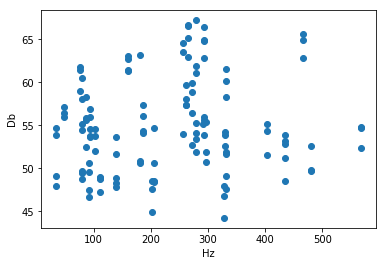

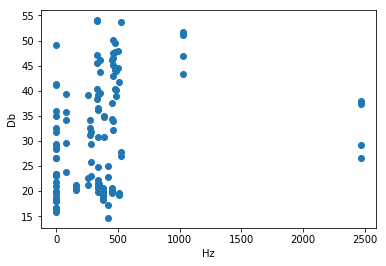

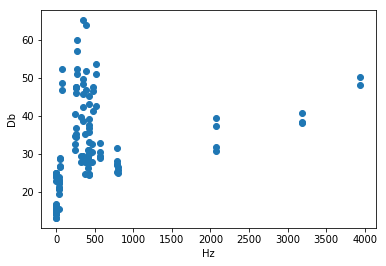

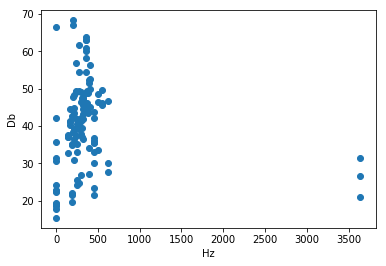

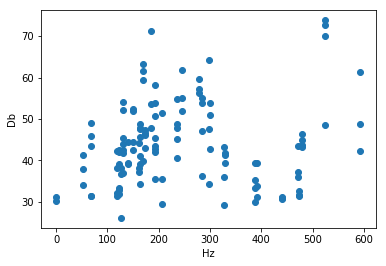

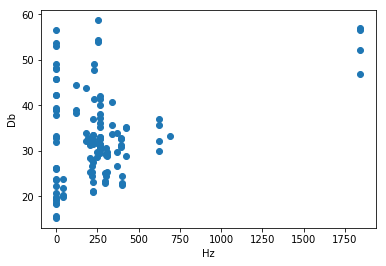

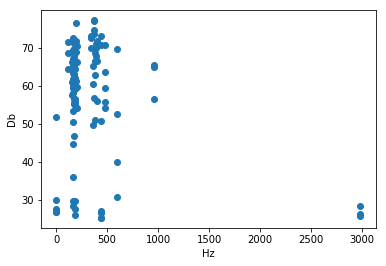

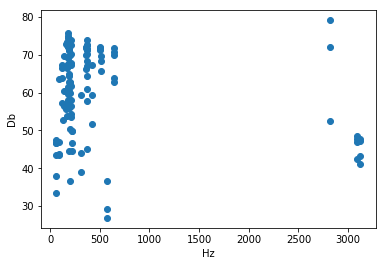

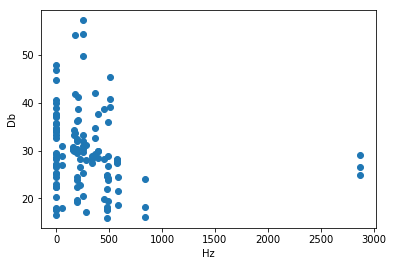

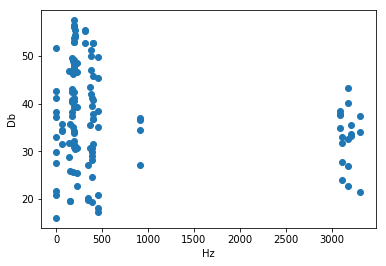

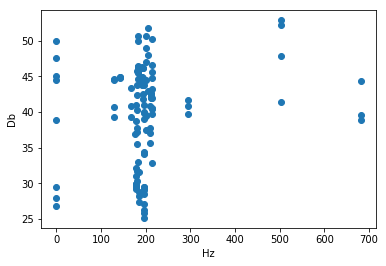

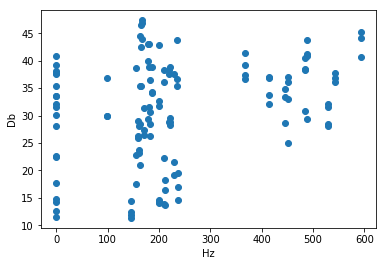

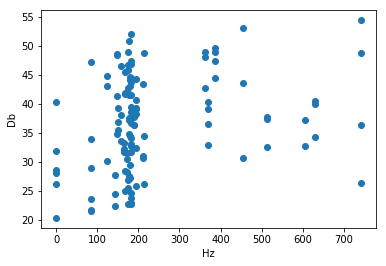

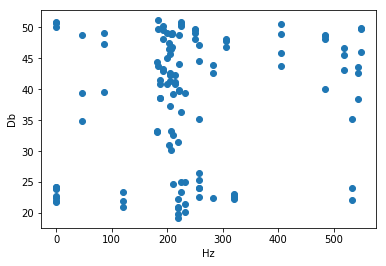

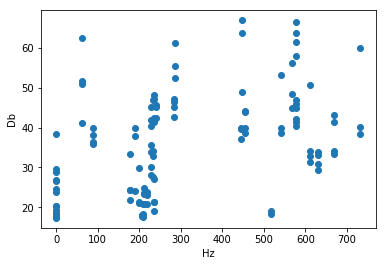

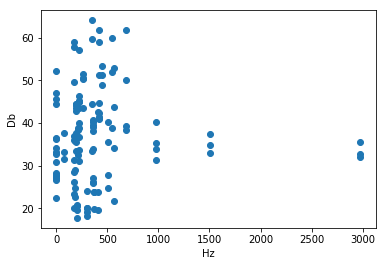

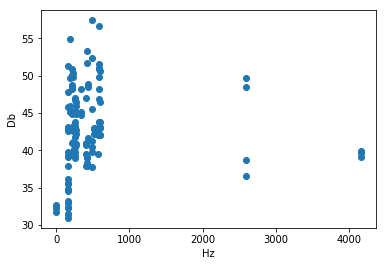

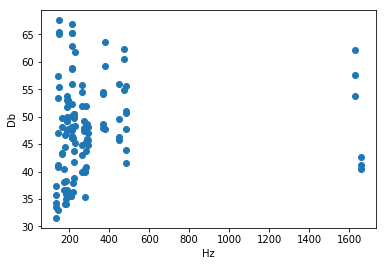

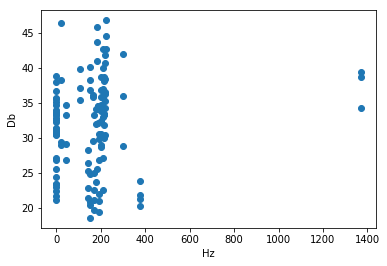

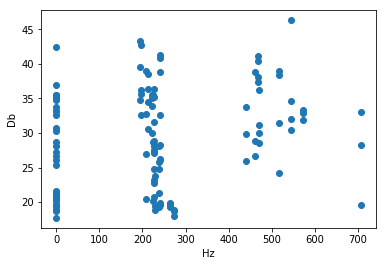

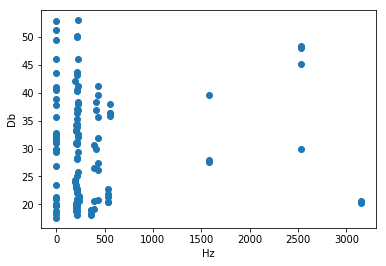

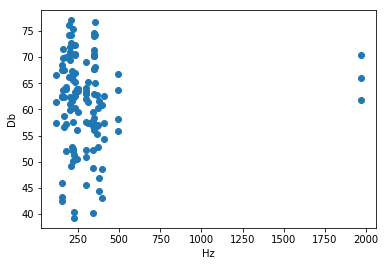

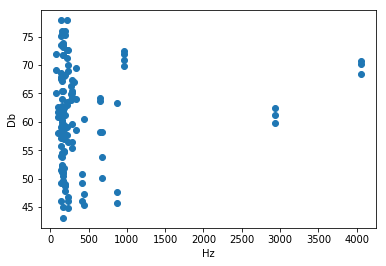

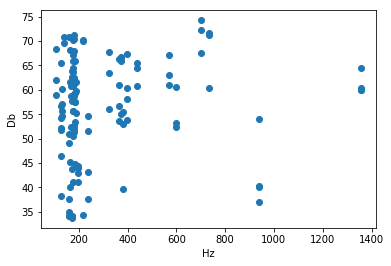

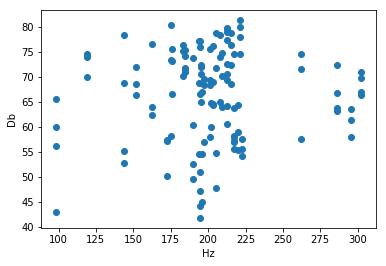

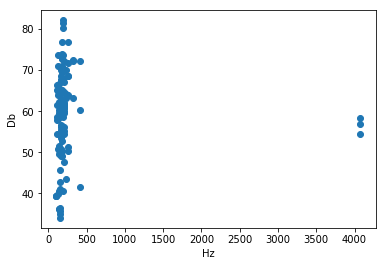

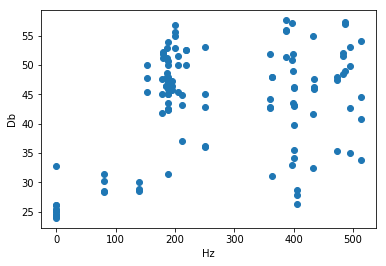

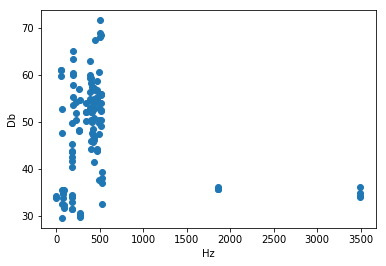

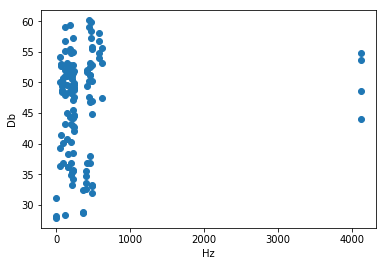

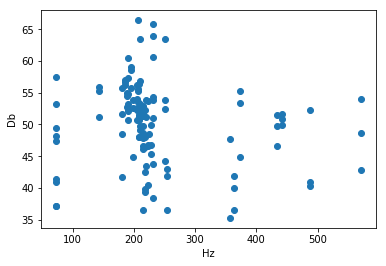

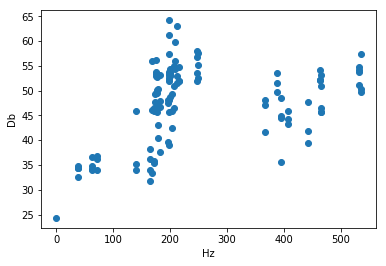

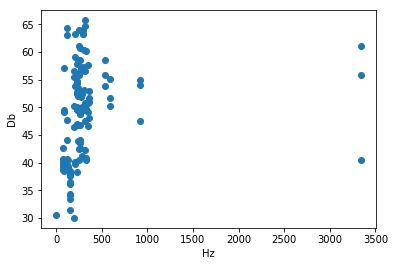

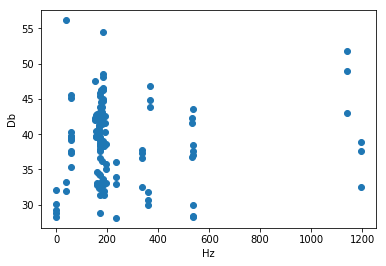

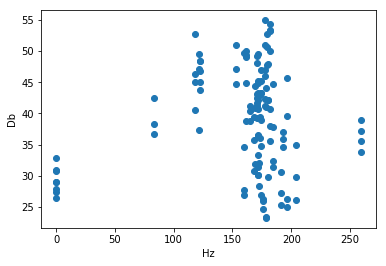

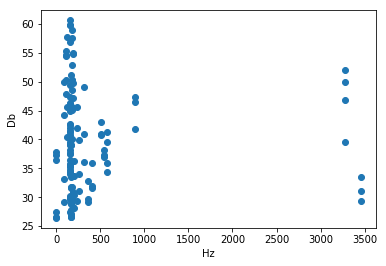

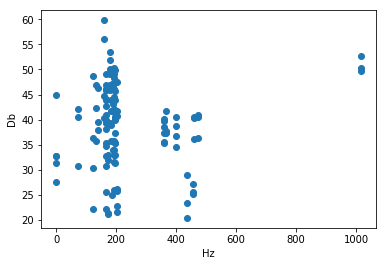

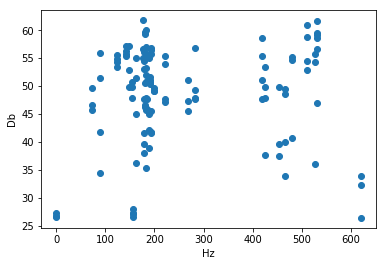

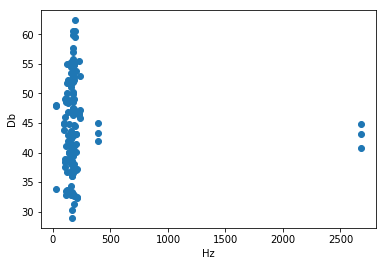

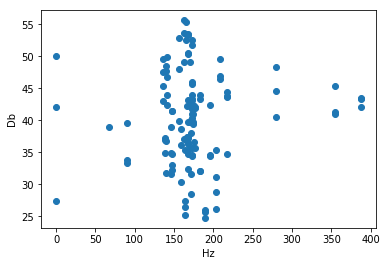

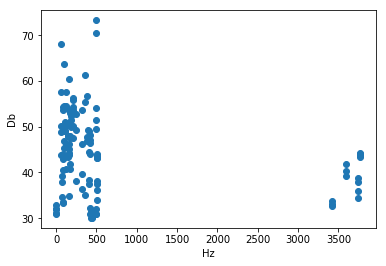

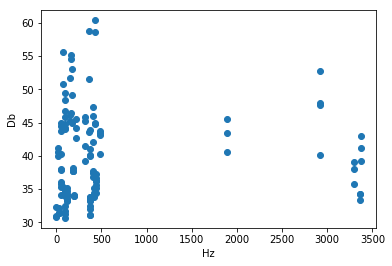

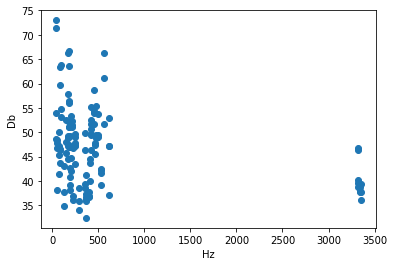

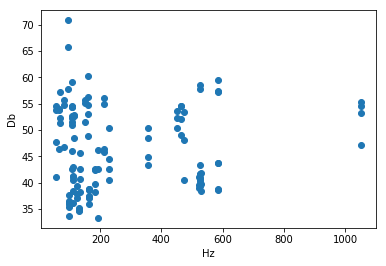

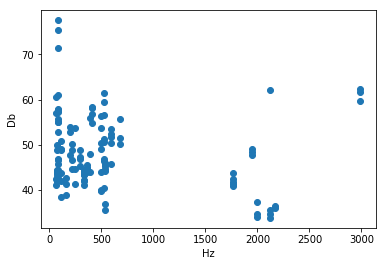

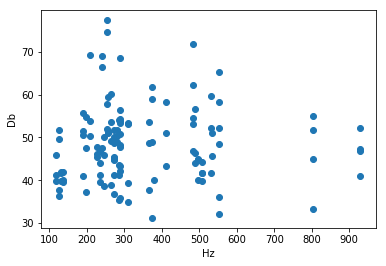

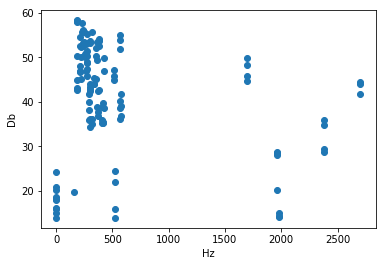

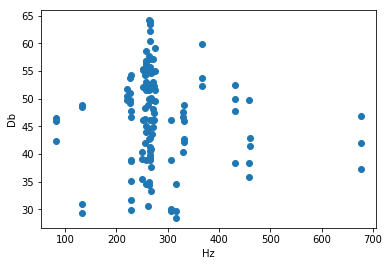

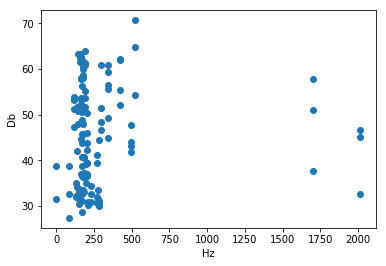

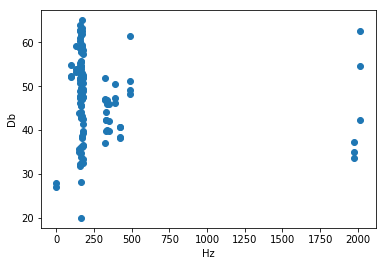

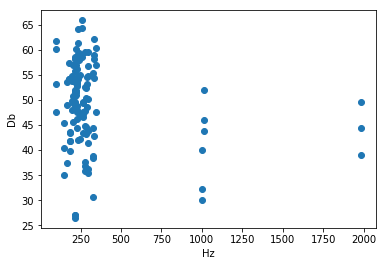

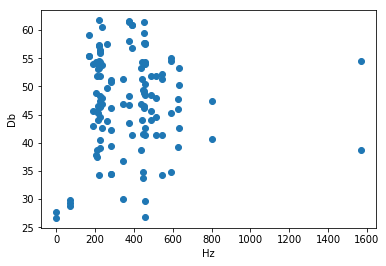

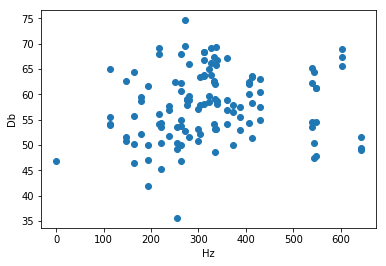

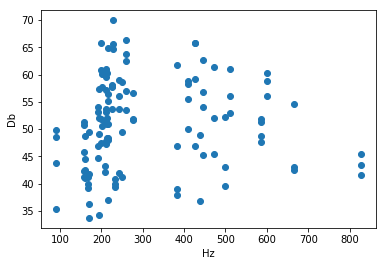

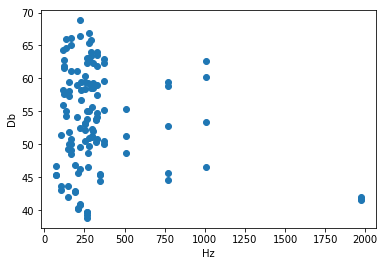

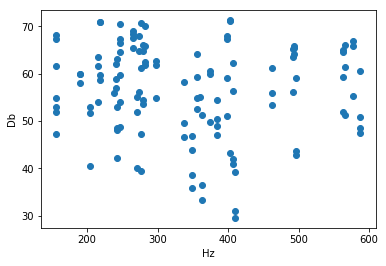

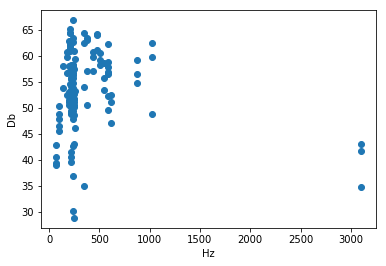

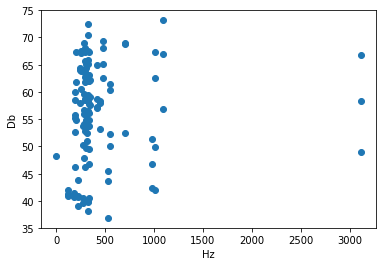

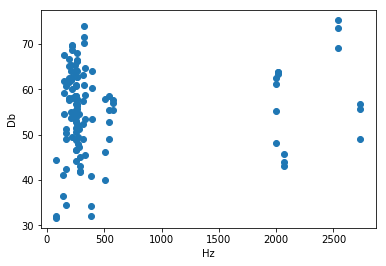

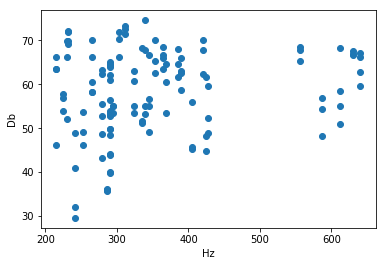

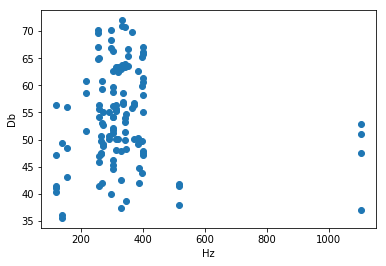

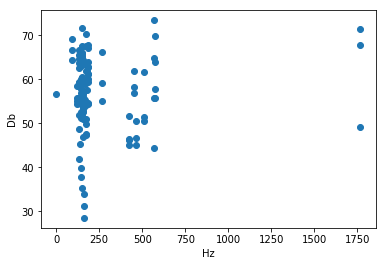

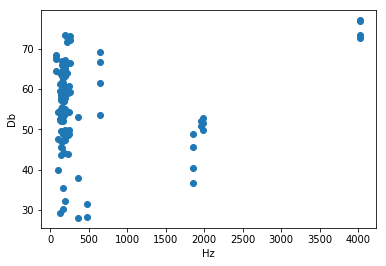

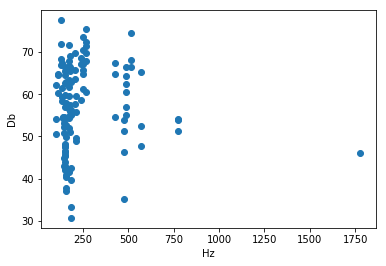

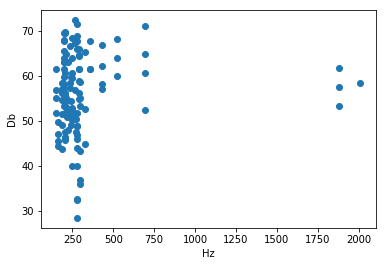

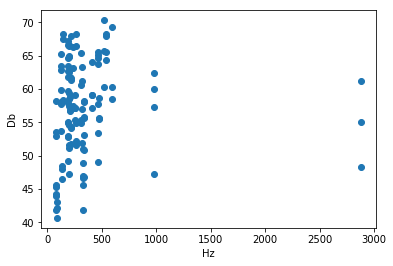

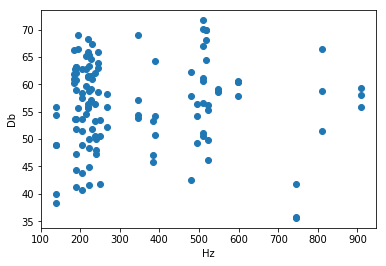

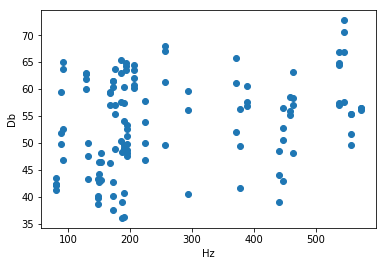

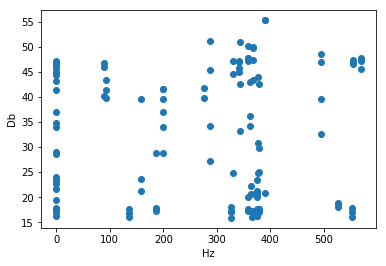

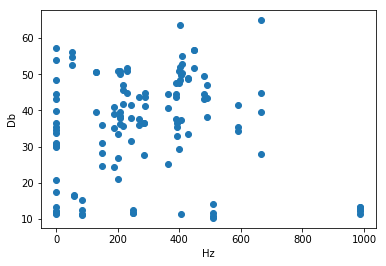

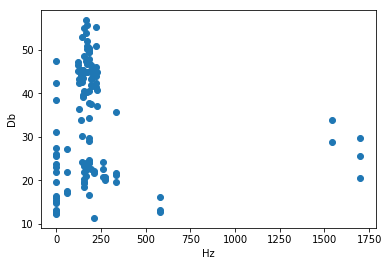

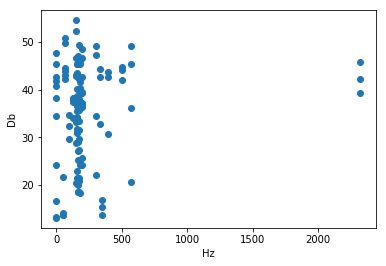

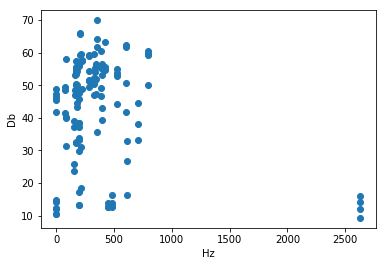

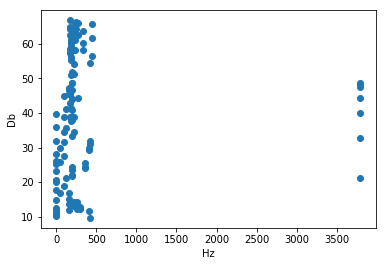

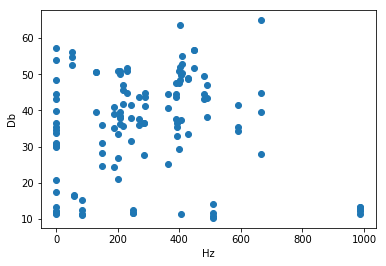

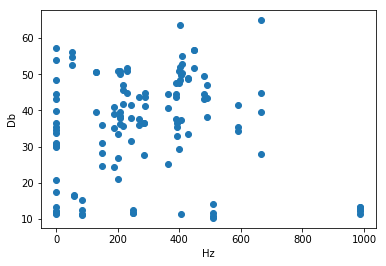

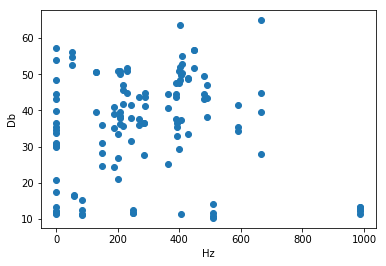

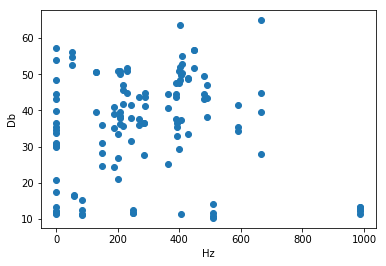

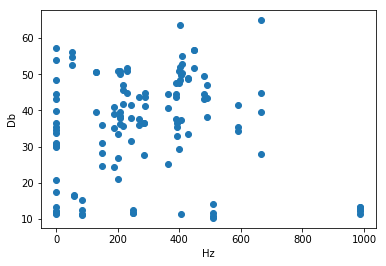

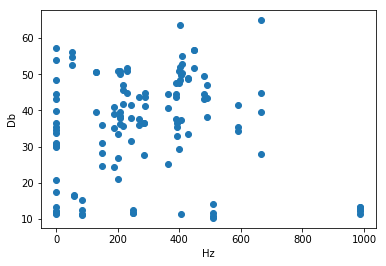

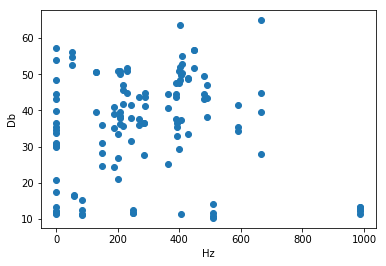

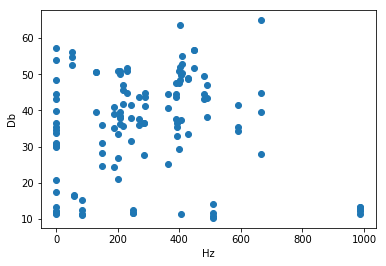

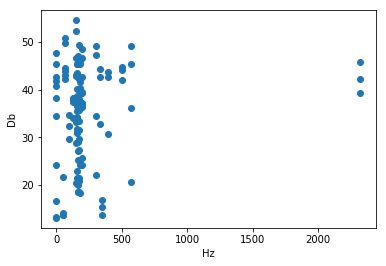

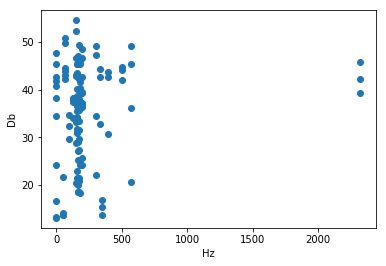

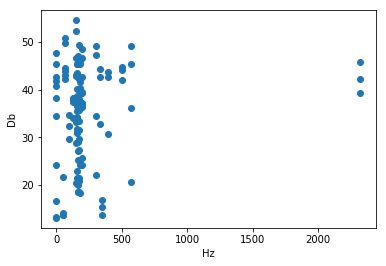

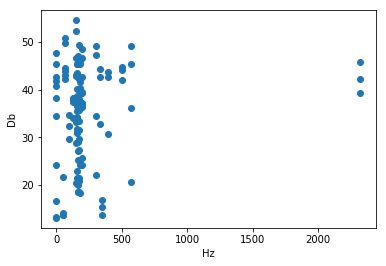

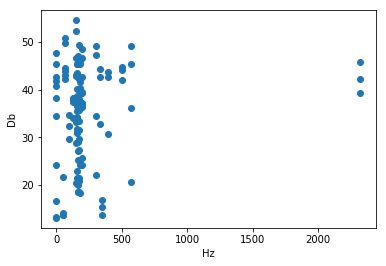

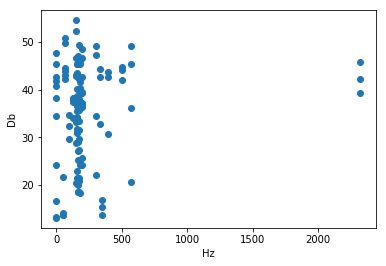

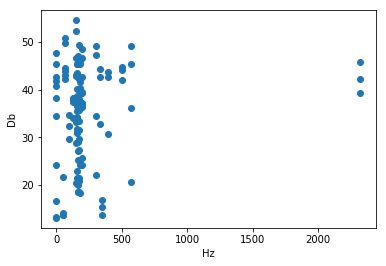

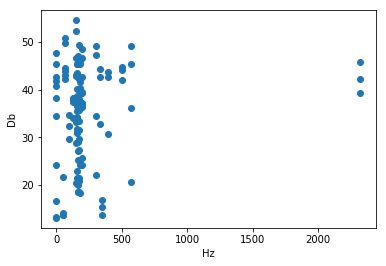

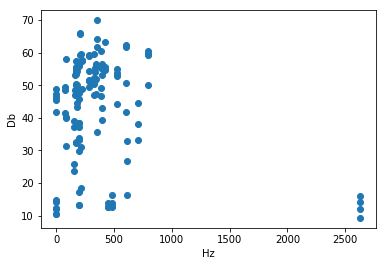

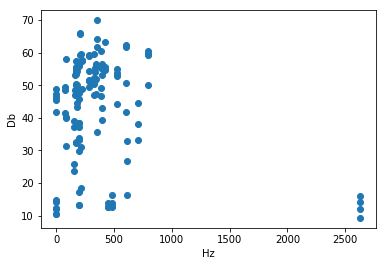

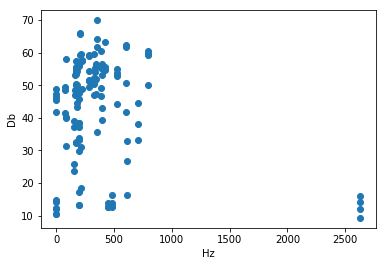

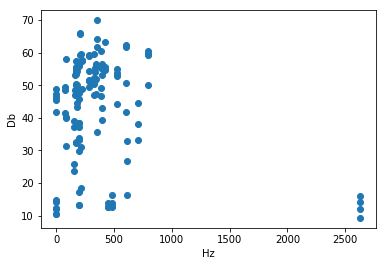

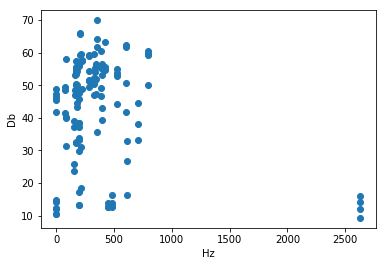

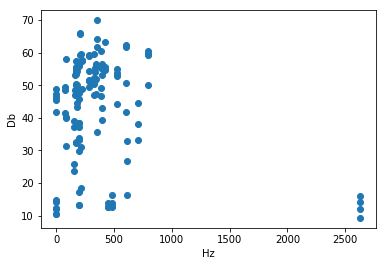

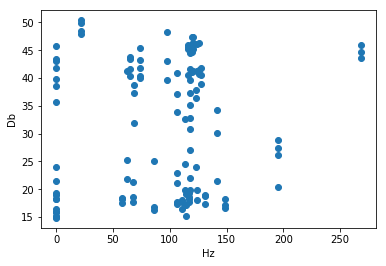

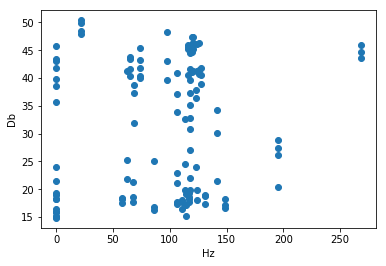

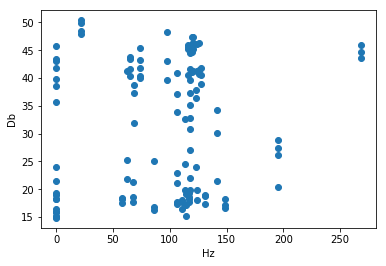

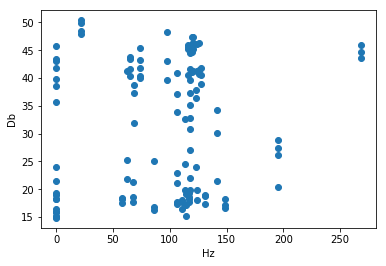

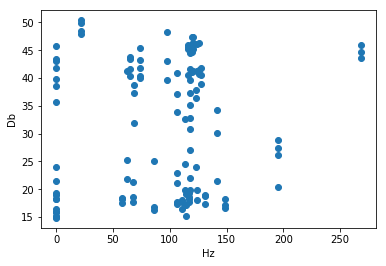

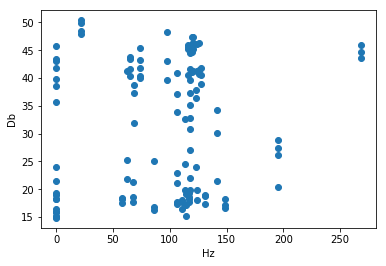

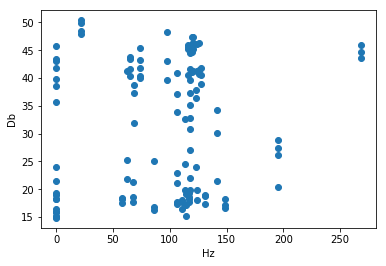

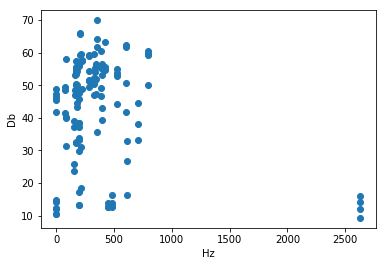

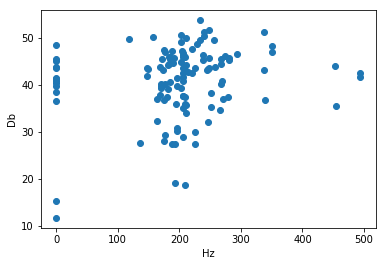

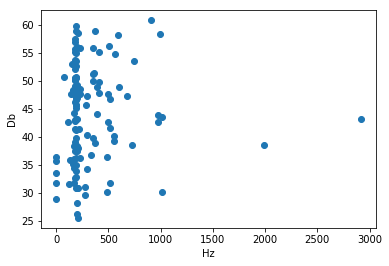

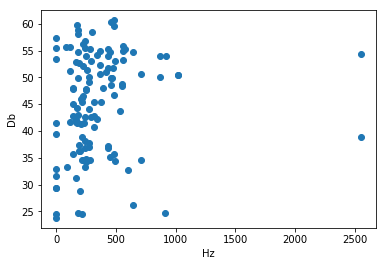

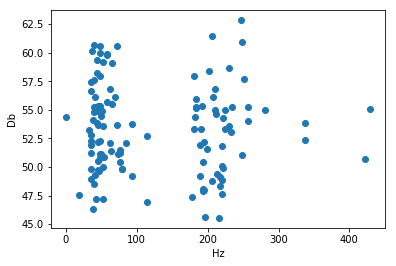

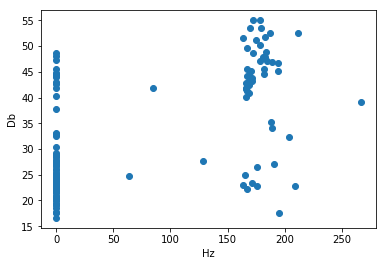

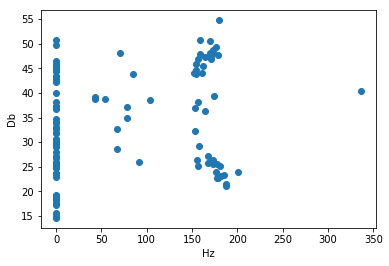

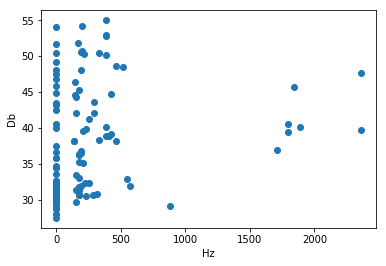

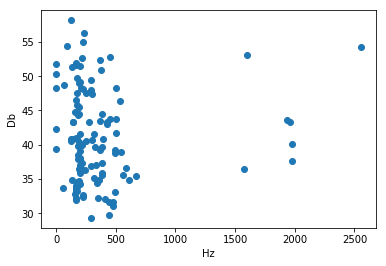

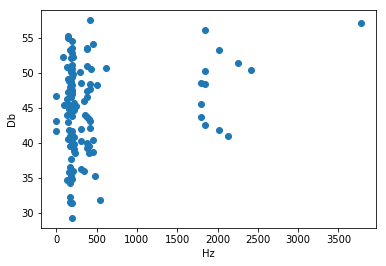

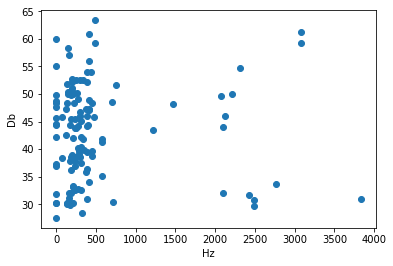

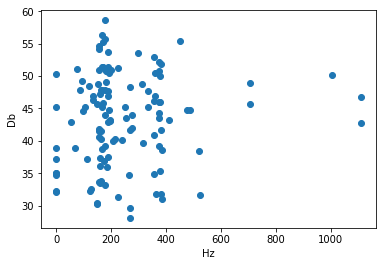

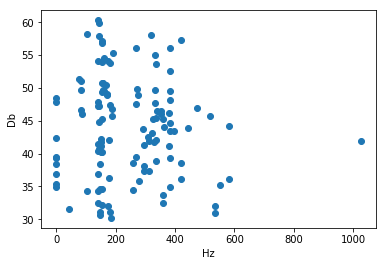

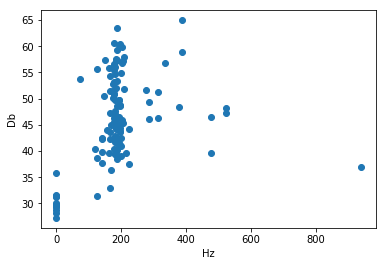

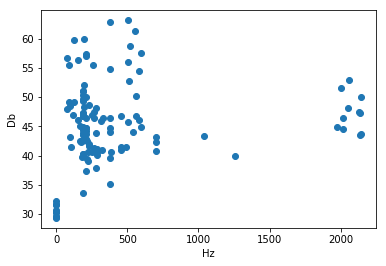

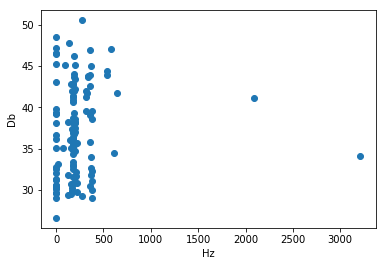

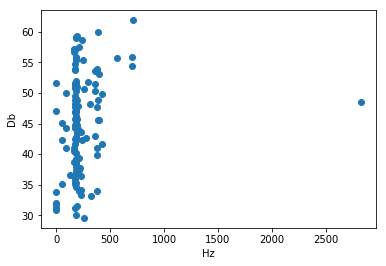

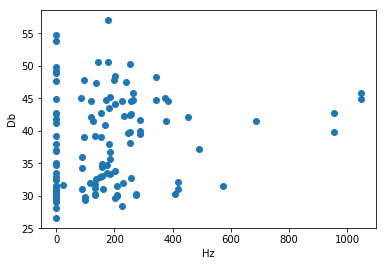

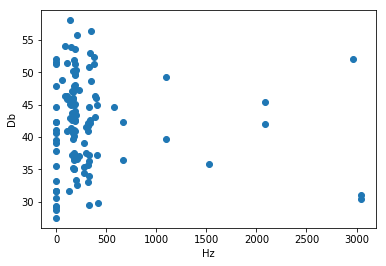

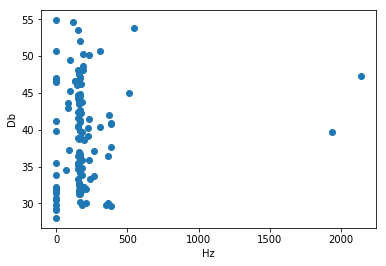

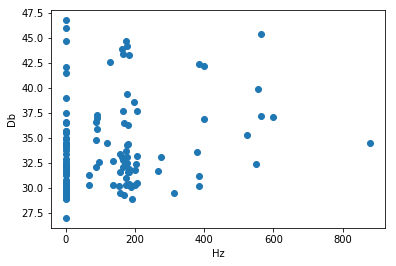

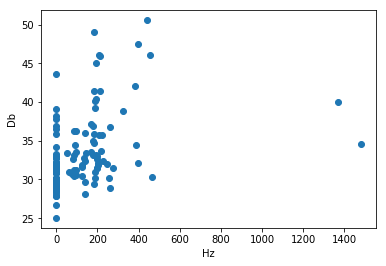

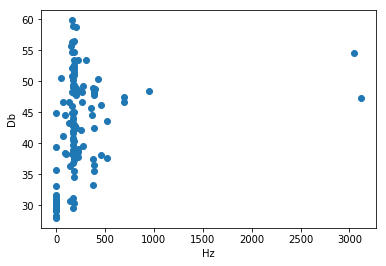

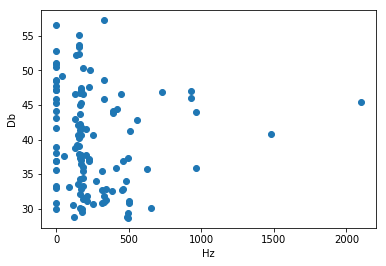

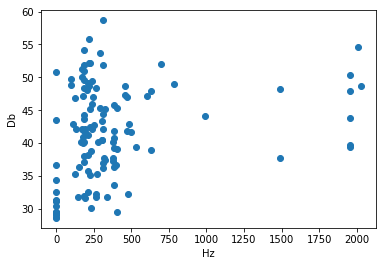

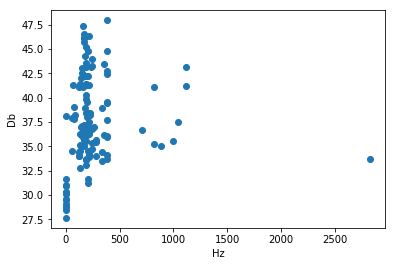

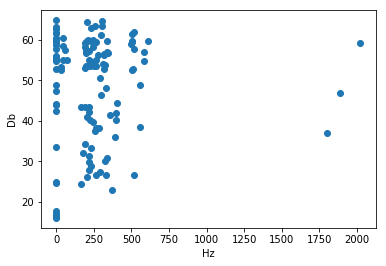

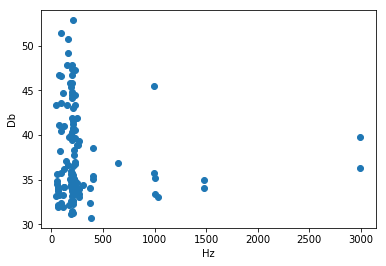

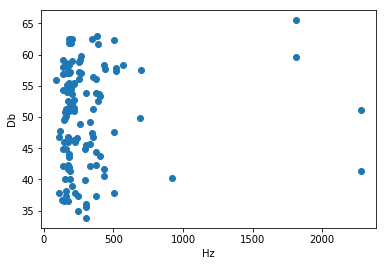

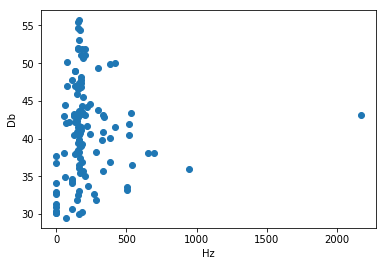

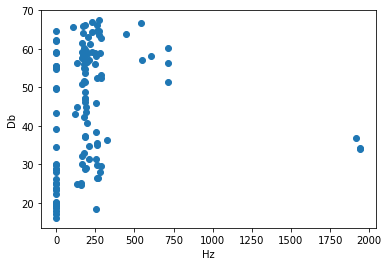

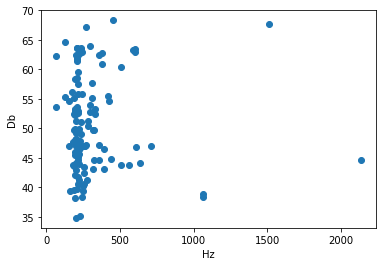

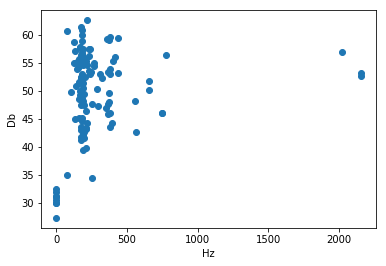

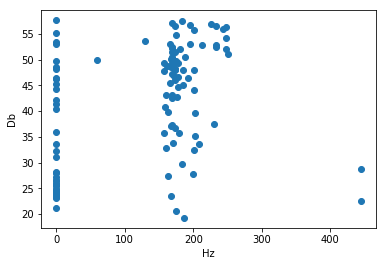

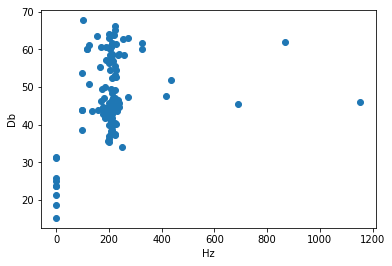

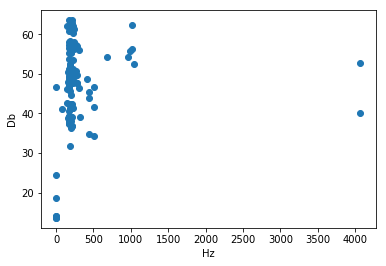

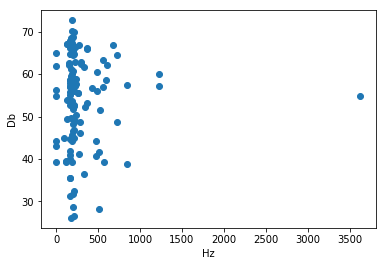

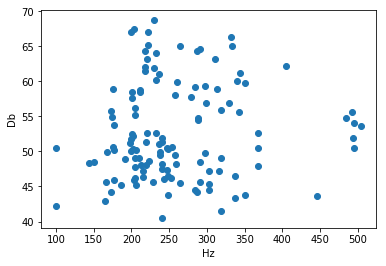

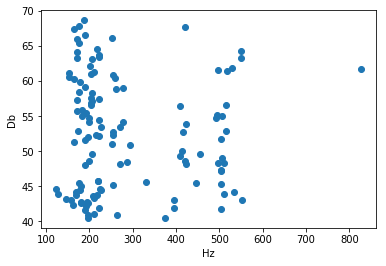

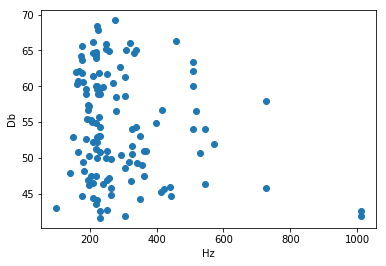

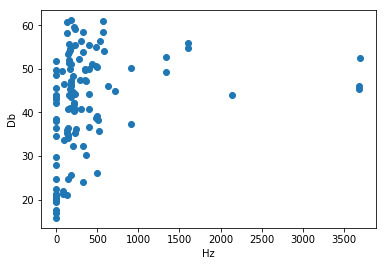

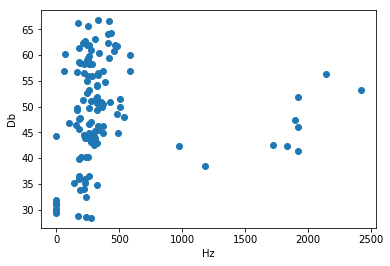

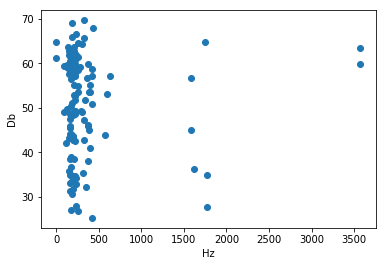

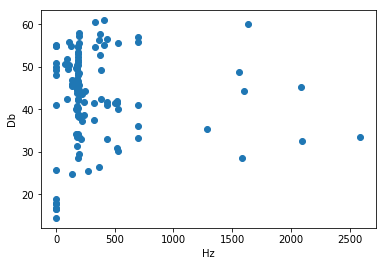

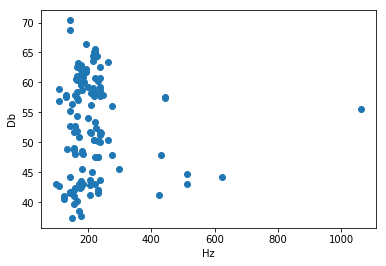

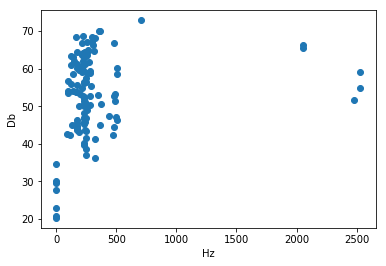

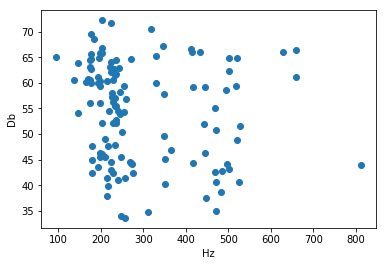

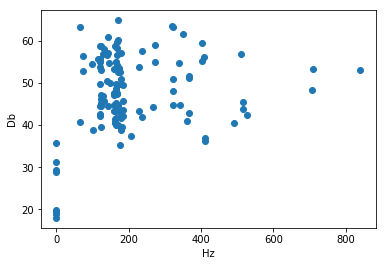

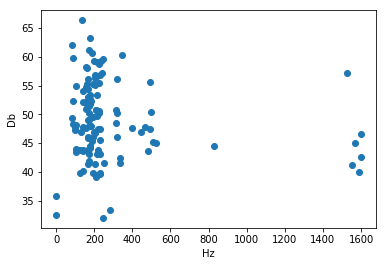

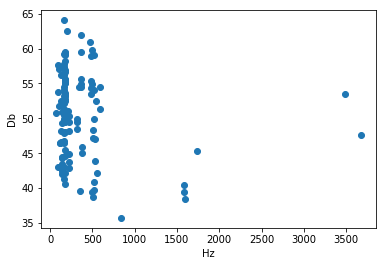

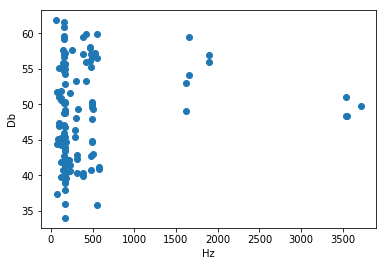

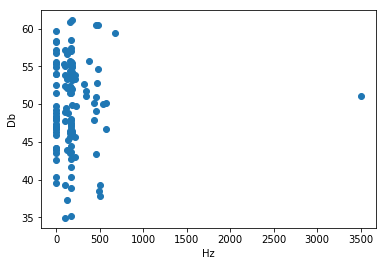

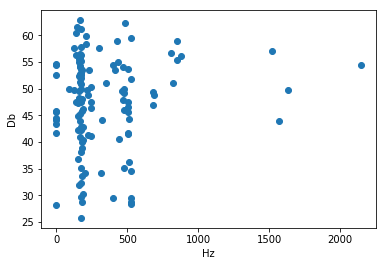

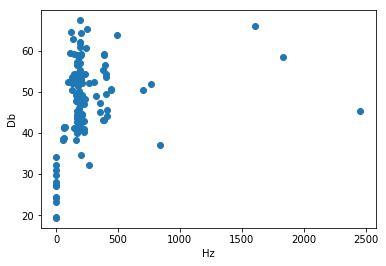

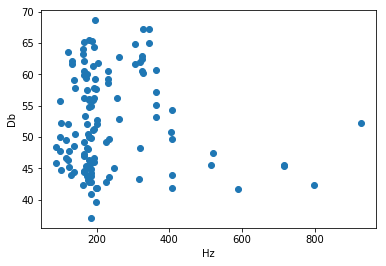

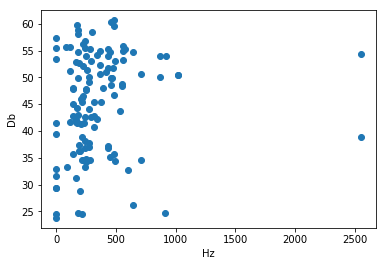

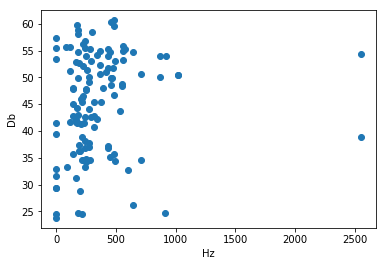

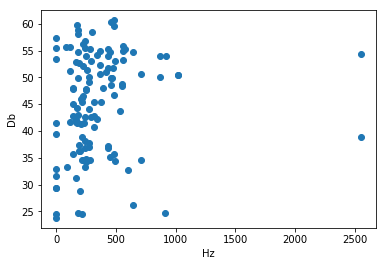

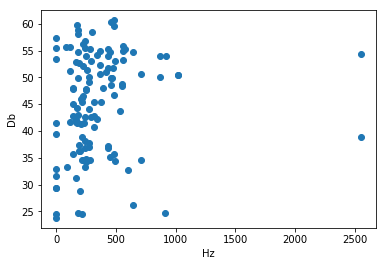

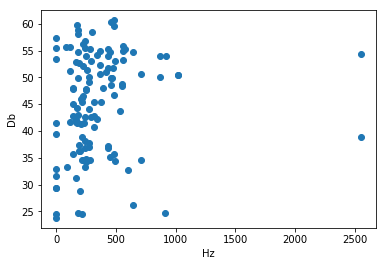

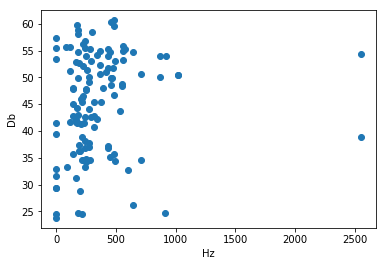

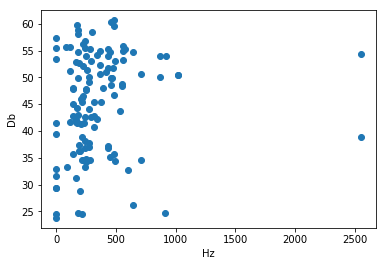

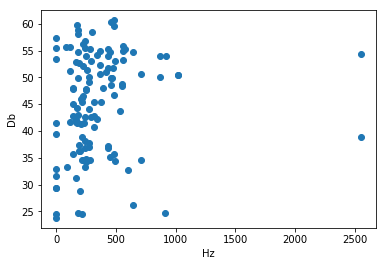

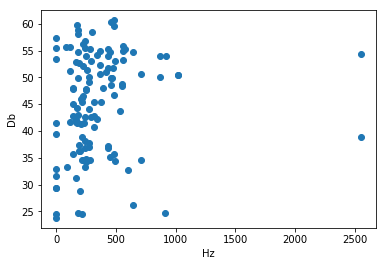

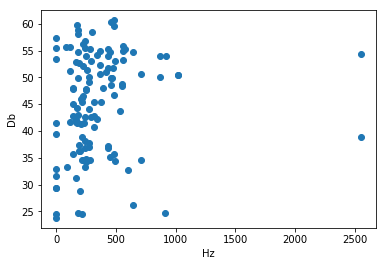

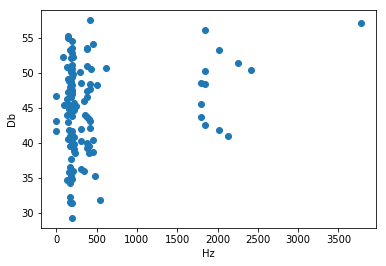

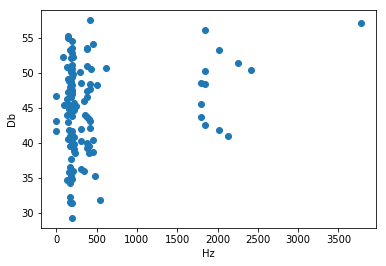

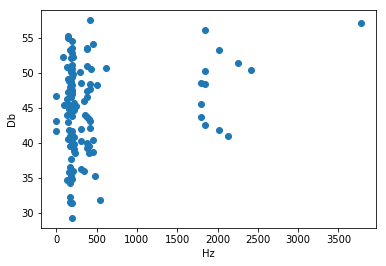

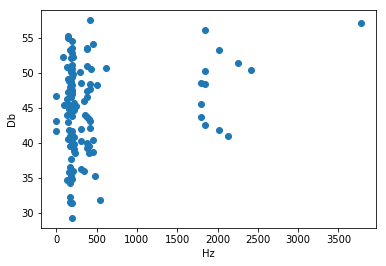

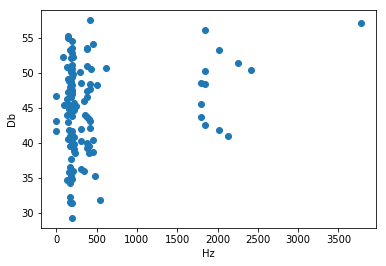

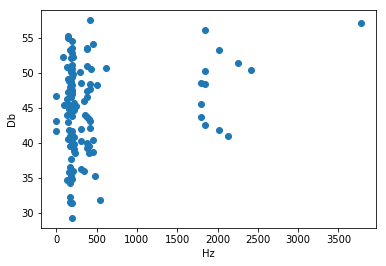

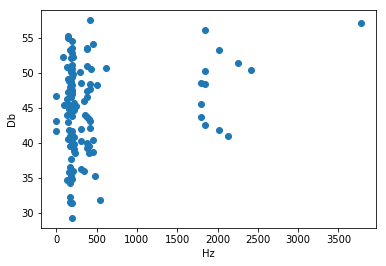

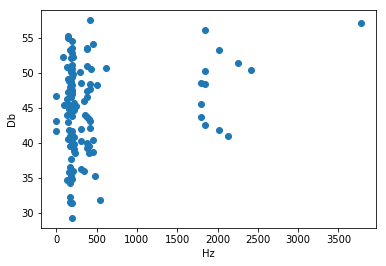

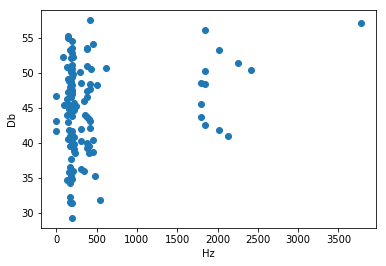

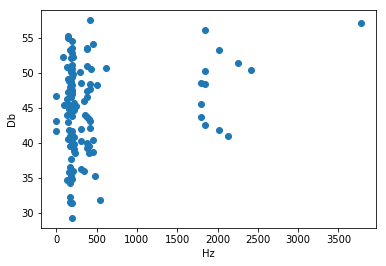

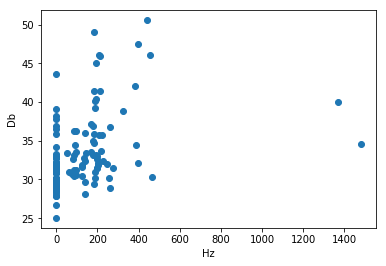

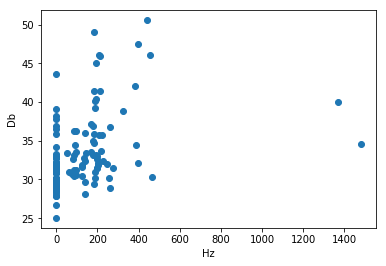

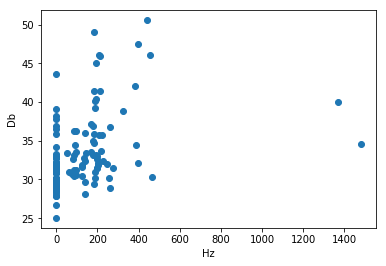

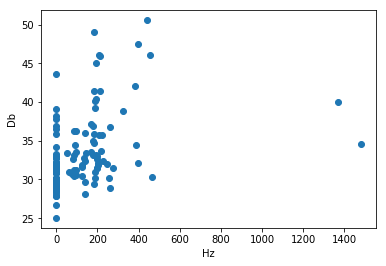

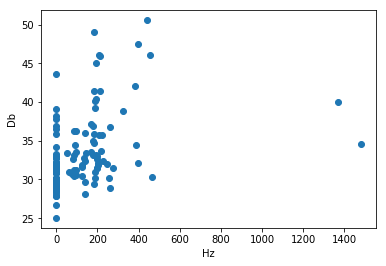

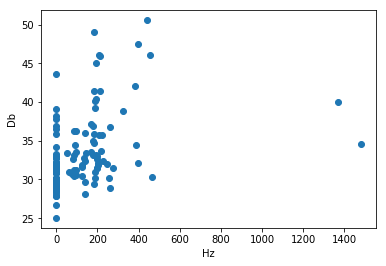

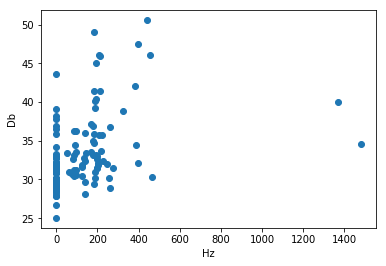

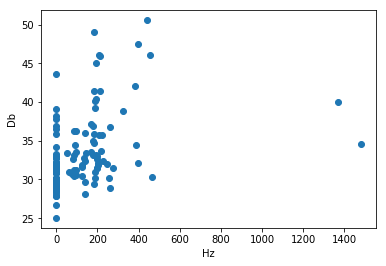

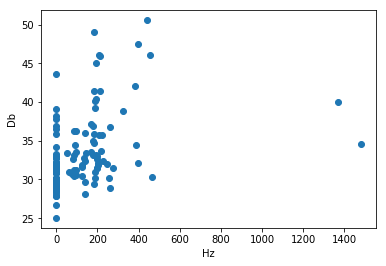

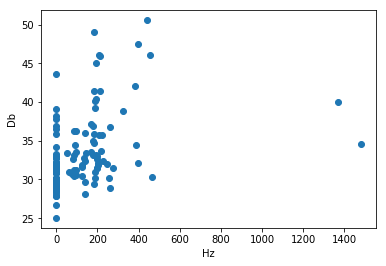

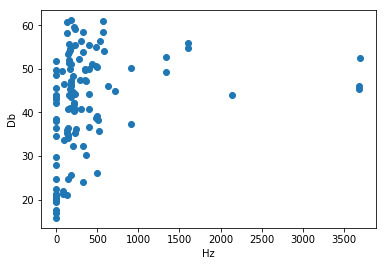

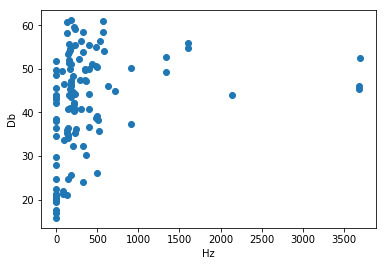

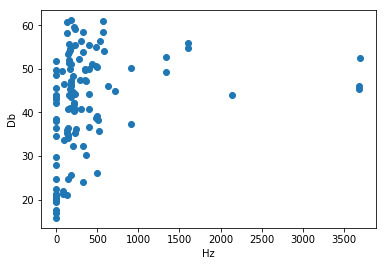

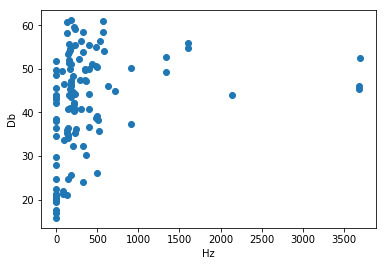

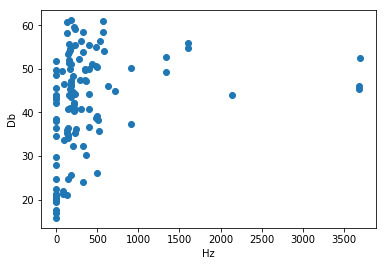

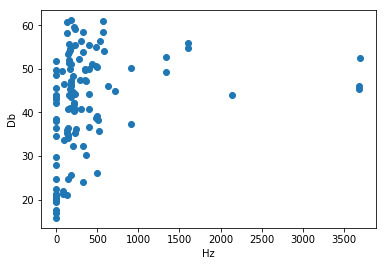

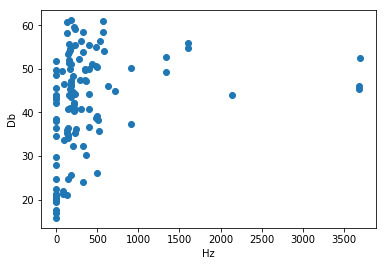

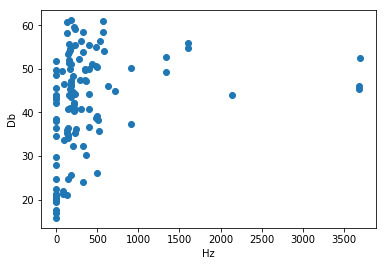

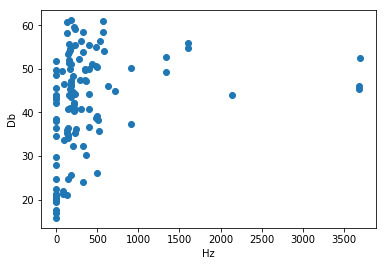

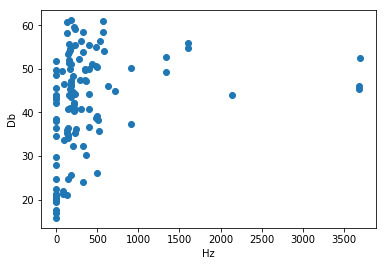

In [15]:
for i in range(len(female)):
    plt.scatter(x=female["Hz"][i], y = female["Db"][i])
    plt.ylabel('Db')
    plt.xlabel('Hz')
    plt.show()

In [16]:
#cut male hz range
for i in range(len(male)):
    for k in range(0,mini):
        if (male["Hz"][i][k] > 260):
            male['Hz'][i][k] = 260 
        else:
            continue
#cut female hz range
for i in range(len(female)):
    for k in range(0,mini):
        if (female["Hz"][i][k] > 525):
            female['Hz'][i][k] = 525
        else:
            continue

In [17]:
#sum up all values for hz and db throgh male
maleSumDb=[]
for i in range(len(male)):
    for k in range(mini):
        maleSumDb.append(male['Db'][i][k])

maleSumHz=[]
for i in range(len(male)):
    for k in range(mini):
        maleSumHz.append(male['Hz'][i][k])

In [18]:
#same for female
femaleSumDb=[]
for i in range(len(female)):
    for k in range(mini):
        femaleSumDb.append(female['Db'][i][k])

femaleSumHz=[]
for i in range(len(female)):
    for k in range(mini):
        femaleSumHz.append(female['Hz'][i][k])

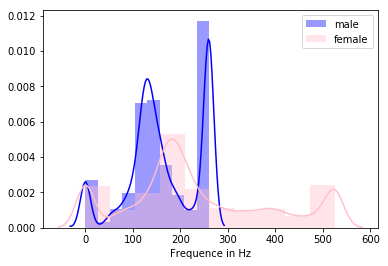

In [19]:
#now fucking plot this shit down!
#for HZ
sns.distplot(maleSumHz,bins=10, color='blue').set(xlabel='Frequence in Hz')
sns.distplot(femaleSumHz,bins=10, color='pink')
pyplot.legend(loc='upper right', labels=['male','female'])

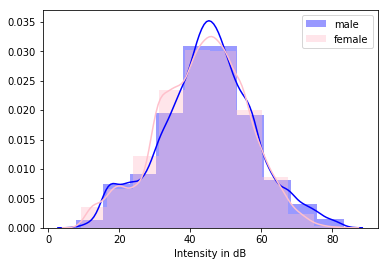

In [20]:
#for DB
sns.distplot(maleSumDb,bins=10, color='blue').set(xlabel='Intensity in dB')
sns.distplot(femaleSumDb,bins=10, color='pink')
pyplot.legend(loc='upper right', labels=['male','female'])

In [21]:
#splitting dataframe trough emotions
angry=result.loc[result["Feeling"]==0]
angry=angry.reset_index(drop=True)

happy=result.loc[result["Feeling"]==1]
happy=happy.reset_index(drop=True)

sad=result.loc[result["Feeling"]==2]
sad=sad.reset_index(drop=True)  

steady=result.loc[result["Feeling"]==3]
steady=steady.reset_index(drop=True)

#sum for sad
SadSumDb=[]
for i in range(len(sad)):
    for k in range(mini):
        SadSumDb.append(sad['Db'][i][k])

SadSumHz=[]
for i in range(len(sad)):
    for k in range(mini):
        SadSumHz.append(sad['Hz'][i][k])
        
##sum happy
happySumDb=[]
for i in range(len(happy)):
    for k in range(mini):
        happySumDb.append(happy['Db'][i][k])

happySumHz=[]
for i in range(len(happy)):
    for k in range(mini):
        happySumHz.append(happy['Hz'][i][k])
        
##sum for steady
steadySumDb=[]
for i in range(len(steady)):
    for k in range(mini):
        steadySumDb.append(steady['Db'][i][k])

steadySumHz=[]
for i in range(len(steady)):
    for k in range(mini):
        steadySumHz.append(steady['Hz'][i][k])
        
#sum for angry
angrySumDb=[]
for i in range(len(angry)):
    for k in range(mini):
        angrySumDb.append(angry['Db'][i][k])

angrySumHz=[]
for i in range(len(angry)):
    for k in range(mini):
        angrySumHz.append(angry['Hz'][i][k])

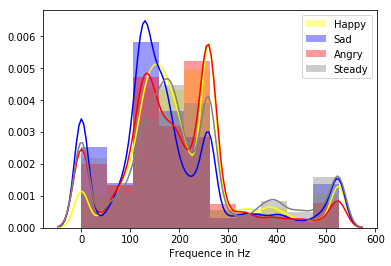

In [22]:
#plot for feelings
#for HZ
sns.distplot(happySumHz,bins=10, color='yellow').set(xlabel='Frequence in Hz')
sns.distplot(SadSumHz,bins=10, color='blue')
sns.distplot(angrySumHz,bins=10, color='red')
sns.distplot(steadySumHz,bins=10, color='gray')
pyplot.legend(loc='upper right', labels=['Happy','Sad','Angry','Steady'])

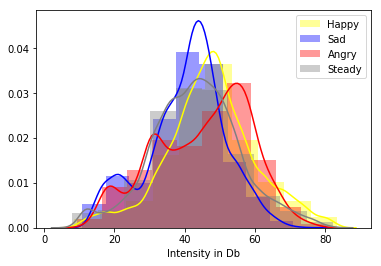

In [23]:
#plot for feelings
#for Db
sns.distplot(happySumDb,bins=10, color='yellow').set(xlabel='Intensity in Db')
sns.distplot(SadSumDb,bins=10, color='blue')
sns.distplot(angrySumDb,bins=10, color='red')
sns.distplot(steadySumDb,bins=10, color='gray')
pyplot.legend(loc='upper right', labels=['Happy','Sad','Angry','Steady'])

# Modelling

In [24]:
#Creating our X matrix
cols=['Db','Hz']#selecting only hz and db data
mat=[] #empty matrix
for c in cols:
    for k in range(mini):
        l=[] #empty array
        for i in range(len(result)):
            l.append(result[c][i][k]) #filling the array making it the column we are going to use
        mat.append(l) #append our column to the matrix
X=pd.DataFrame(mat) #make it a pandas df
X=X.T #transpose it
X=pd.concat([X,result.Person],axis=1)#add person column

first 123 columns are the decibel records, while other 123 are the pitch record. we just want to add columns with summary of them in order to keep the relationship between values

In [25]:
#Adding mean, max, min and SD columns, for DB and for HZ
X['dbMean']=X.iloc[:,0:mini].mean(axis=1)
X['dbMax']=X.iloc[:,0:mini].max(axis=1)
X['dbMin']=X.iloc[:,0:mini].min(axis=1)
X['dbSd']=X.iloc[:,0:mini].std(axis=1)

X['hzMean']=X.iloc[:,mini:mini*2].mean(axis=1)
X['hzMax']=X.iloc[:,mini:mini*2].max(axis=1)
X['hzMin']=X.iloc[:,mini:mini*2].min(axis=1)
X['hzSd']=X.iloc[:,mini:mini*2].std(axis=1)

In [26]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,245,Person,dbMean,dbMax,dbMin,dbSd,hzMean,hzMax,hzMin,hzSd
0,51.509708,49.206464,53.098951,52.469692,53.167057,52.176484,48.654212,53.256975,52.688264,56.267311,...,78.327759,3,45.657025,60.430434,28.226776,10.198261,145.237673,260.0,0.000000,81.641767
1,55.108600,51.864689,51.652674,47.638640,49.127333,48.002193,53.917669,54.711934,54.078948,51.856219,...,332.609030,3,54.988873,67.219331,44.254314,5.501162,230.270785,525.0,34.603928,129.447513
2,29.527381,27.660101,25.288264,20.859257,22.952716,26.111523,39.505439,35.678947,34.919236,32.231507,...,64.099609,3,34.554521,57.734981,20.859257,6.980656,138.710652,260.0,0.000000,79.049734
3,33.119447,28.733595,33.640379,45.195911,46.322613,38.580593,42.709851,39.776593,30.642523,24.077781,...,168.398966,3,39.661745,62.649082,24.077781,7.639918,175.740902,260.0,75.366211,55.562299
4,19.453184,18.038502,16.372480,15.836151,23.020714,23.356387,21.816119,22.132527,21.352715,19.915726,...,497.380534,3,30.749519,54.035856,14.676970,10.982163,296.812608,525.0,0.000000,186.714036


In [27]:
#setting our y 
y=result.Male

#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Naive Bayes
## on Gender

In [28]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
model_gnb.score(X_test, y_test)


0.9624060150375939

In [29]:
GNB_predictions = model_gnb.predict(X_test)
false_positive_rate_GNB, true_positive_rate_GNB, thresholds_GNB = roc_curve(y_test, GNB_predictions)
roc_auc_GNB = auc(false_positive_rate_GNB, true_positive_rate_GNB)
roc_auc_GNB

0.9620697463768115

# Random forest
## on Gender

In [30]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(X_train, y_train)  
RF.score(X_test,y_test)

0.924812030075188

In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RF_AutoTuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model


In [32]:
RF_AutoTuned.fit(X_train, y_train)
RF_predictions = RF_AutoTuned.predict(X_test)
RF_AutoTuned.score(X_test,y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


0.9849624060150376

In [33]:
false_positive_rate_RF, true_positive_rate_RF, thresholds_RF = roc_curve(y_test, RF_predictions)
roc_auc_RF = auc(false_positive_rate_RF, true_positive_rate_RF)
roc_auc_RF

0.984375

# Support vector machine 
## on Gender

In [34]:
SVM = svm.LinearSVC()  
SVM.fit(X_train, y_train)  
SVM.predict(X_test) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.])

In [35]:
SVM.score(X_test,y_test)

0.8796992481203008

In [36]:
svm=SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
SVM_AutoTuned = GridSearchCV(svm, parameters)

In [37]:
SVM_AutoTuned.fit(X_train, y_train)
SVM_predictions = SVM_AutoTuned.predict(X_test)
SVM_AutoTuned.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9172932330827067

In [38]:
false_positive_rate_svm, true_positive_rate_svm, thresholds_svm = roc_curve(y_test, SVM_predictions)
roc_auc_svm = auc(false_positive_rate_svm, true_positive_rate_svm)
roc_auc_svm

0.916893115942029

# Logistic regression
## on Gender

In [39]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)  
LR_predictions = LR.predict(X_test)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [40]:
LR.score(X_test,y_test)

0.8646616541353384

In [41]:
false_positive_rate_LR, true_positive_rate_LR, thresholds_LR = roc_curve(y_test, LR_predictions)
roc_auc_LR = auc(false_positive_rate_LR, true_positive_rate_LR)
roc_auc_LR

0.8644701086956521

# Neural Network
## on Gender

In [42]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(X_train, y_train)  
NN.predict(X_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
NN.score(X_test, y_test)

0.518796992481203

In [44]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
NN_AutoTuned = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

NN_AutoTuned.fit(X_train, y_train)
NN_AutoTuned.score(X_test,y_test)
NN_predictions = NN_AutoTuned.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
false_positive_rate_NN, true_positive_rate_NN, thresholds_NN = roc_curve(y_test, NN_predictions)
roc_auc_NN = auc(false_positive_rate_NN, true_positive_rate_NN)
roc_auc_NN

0.8488451086956521

# Gradient Boosting
## on gender

In [46]:
xgb1 = XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.01, 0.05, .1], #so called `eta` value
              'max_depth': [3, 4, 2],
              'min_child_weight': [1],
              'silent': [1],
              'subsample': [1],
              'colsample_bytree': [0.5,0.7],
              'n_estimators': [1000]}

GB_AutoTuned = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

GB_AutoTuned.fit(X_train, y_train)
GB_predictions = GB_AutoTuned.predict(X_test)
GB_AutoTuned.score(X_test,y_test)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\si

0.9924812030075187

In [47]:
false_positive_rate_GB, true_positive_rate_GB, thresholds_GB = roc_curve(y_test, GB_predictions)
roc_auc_GB = auc(false_positive_rate_GB, true_positive_rate_GB)
roc_auc_GB

0.9921875

# KNN 
## on Gender

In [51]:
# construct the set of hyperparameters to tune
params = {"n_neighbors": np.arange(1, 31, 2),
    "metric": ["euclidean", "cityblock"]}
model = KNeighborsClassifier()
model_KNN = GridSearchCV(model, params)
model_KNN.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]), 'metric': ['euclidean', 'cityblock']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
KNN_predictions = model_KNN.predict(X_test)
model_KNN.score(X_test,y_test)

0.8571428571428571

In [53]:
false_positive_rate_KNN, true_positive_rate_KNN, thresholds_KNN = roc_curve(y_test, KNN_predictions)
roc_auc_KNN= auc(false_positive_rate_KNN, true_positive_rate_KNN)
roc_auc_KNN

0.8526947463768115

# Plot AUC

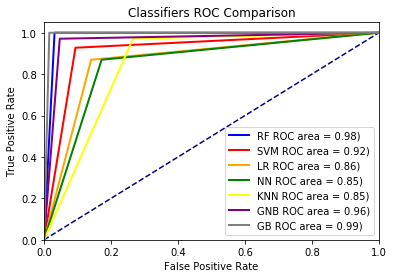

In [55]:
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Classifiers ROC Comparison')
plt.plot(false_positive_rate_RF, true_positive_rate_RF, color='blue', lw=2, label='RF ROC area = %0.2f)' % roc_auc_RF)
plt.plot(false_positive_rate_svm, true_positive_rate_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(false_positive_rate_LR, true_positive_rate_LR, color='orange', lw=2, label='LR ROC area = %0.2f)' % roc_auc_LR)
plt.plot(false_positive_rate_NN, true_positive_rate_NN, color='green', lw=2, label='NN ROC area = %0.2f)' % roc_auc_NN)
plt.plot(false_positive_rate_KNN, true_positive_rate_KNN, color='yellow', lw=2, label='KNN ROC area = %0.2f)' % roc_auc_KNN)
plt.plot(false_positive_rate_GNB, true_positive_rate_GNB, color='purple', lw=2, label='GNB ROC area = %0.2f)' % roc_auc_GNB)
plt.plot(false_positive_rate_GB, true_positive_rate_GB, color='grey', lw=2, label='GB ROC area = %0.2f)' % roc_auc_GB)
plt.legend(loc="lower right")
plt.show()

# MODELS ON FEELING

In [56]:
y=result.Feeling 


#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Support vector machine 
## on Feeling

In [58]:
SVM = SVC(decision_function_shape="ovo")  
SVM.fit(X_train, y_train)  
SVM.predict(X_test) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 0, 1, 3, 0, 3, 3, 3, 3, 2,
       1, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 2, 3,
       3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3,
       2, 3, 3, 0, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 1, 3, 1, 2, 2, 3, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 2, 1, 0, 3, 3, 3, 3, 2, 3, 1,
       1])

In [59]:
SVM.score(X_test,y_test)

0.556390977443609

In [60]:
SVM_AutoTuned.fit(X_train, y_train)
SVM_AutoTuned.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.5338345864661654

# Logistic regression
## on Feeling

In [62]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)  
LR_predictions = LR.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [63]:
LR.score(X_test,y_test)

0.6015037593984962

# Random forest
## on Feeling

In [65]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(X_train, y_train)  
RF_predictions = RF.predict(X_test)

In [66]:
RF.score(X_test,y_test)

0.5488721804511278

In [67]:
RF_AutoTuned.fit(X_train, y_train)
RF_AutoTuned.score(X_test,y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6466165413533834

# Neural Network
## on Feeling

In [68]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(X_train, y_train)  
NN.predict(X_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [69]:
NN.score(X_test, y_test)

0.24812030075187969

In [70]:
NN_AutoTuned.fit(X_train, y_train)
NN_AutoTuned.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.3233082706766917

# Gradient Boosting 
## on Feeling

In [71]:
GB_AutoTuned.fit(X_train, y_train)
GB_AutoTuned.score(X_test,y_test)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\si

0.6616541353383458

# KNN 
## on Feeling

In [77]:
# construct the set of hyperparameters to tune
params = {"n_neighbors": np.arange(1, 31, 2),
    "metric": ["euclidean", "cityblock"]}
model = KNeighborsClassifier()
model_KNN = GridSearchCV(model, params)
model_KNN.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]), 'metric': ['euclidean', 'cityblock']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
KNN_predictions = model_KNN.predict(X_test)
model_KNN.score(X_test,y_test)

0.6240601503759399

# Naive Bayes
## on Feeling

In [74]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
model_gnb.score(X_test, y_test)

0.518796992481203

# Clustering

In [75]:
##set the kmean model
kmeans = KMeans(init='k-means++', n_init=10, n_clusters=2, random_state=0).fit(list(result["Db"]))

In [80]:
##predict the gender from Db for each line in the matrix
count=0 #to count how many times it's right
for i in range(len(result)):
    pred=kmeans.predict(list([result["Hz"][i]])) #say in which cluster is the datapoint db, i
    true=result["Male"][i] #the true Male value of line i 
    
#     print(str(pred)+" "+str(true))
    if pred==true: #if he get the real value
        count+=1
# print(str(count)+"/"+str(len(result)))     #print how many times it predict  
print(count/len(result))

0.511166253101737
